In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd

!pwd
df = pd.read_csv(r"/Users/maguina/Downloads/SML310/SML310-FinalProjectInfo/top200df.csv")
print(df.columns)
print(df.head())

/Users/maguina/Downloads
Index(['Artist', 'number_of_songs', 'total_times_in_top200', 'total_streams',
       'race'],
      dtype='object')
                Artist  number_of_songs  total_times_in_top200  total_streams  \
0               *NSYNC              1.0                    3.0      5690510.0   
1             2 Chainz             14.0                  132.0    275432430.0   
2            21 Savage             39.0                  323.0    914888503.0   
3            22 Savage              1.0                    2.0      4982496.0   
4  5 Seconds of Summer              5.0                   79.0    236805582.0   

    race  
0  white  
1    POC  
2    POC  
3    POC  
4  white  


In [22]:
## Making a DF

df = pd.DataFrame(df)
df.dropna(inplace=True)

## Adding mixed to POC
df['race'].replace({"Mixed": "POC"}, inplace = True)

In [23]:
## predicting race with total streams

## Test/train/split
X = df[df.columns.tolist()[1:-1]]
y = df['race']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

# Checking split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(474, 3)
(119, 3)
(474,)
(119,)


In [24]:
## Performing an exploratory data analysis 

## Making a training set one dataset:

Xs_train = pd.DataFrame(X_train)
ys_train = pd.DataFrame(y_train)

training = pd.concat([Xs_train,ys_train], axis = 1)

print(training.describe())

       number_of_songs  total_times_in_top200  total_streams
count       474.000000             474.000000   4.740000e+02
mean          4.424051              42.913502   1.163049e+08
std           7.819551              86.041087   2.726709e+08
min           1.000000               1.000000   1.029544e+06
25%           1.000000               4.000000   6.255482e+06
50%           1.000000              11.000000   2.442289e+07
75%           4.000000              41.000000   1.040332e+08
max          83.000000             922.000000   3.441947e+09


                       number_of_songs  total_times_in_top200  total_streams
number_of_songs               1.000000               0.798017       0.766478
total_times_in_top200         0.798017               1.000000       0.979760
total_streams                 0.766478               0.979760       1.000000


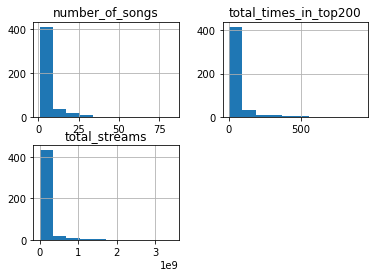

     number_of_songs  total_times_in_top200  total_streams   race
224              1.0                    1.0      2454543.0  white
431              1.0                    2.0      3017351.0    POC
468              7.0                  141.0    230596338.0  white
45               1.0                   10.0     31585488.0  white
206              1.0                    1.0      1344245.0  white
..               ...                    ...            ...    ...
277              1.0                    9.0     22437187.0    POC
9               11.0                  212.0    653276660.0    POC
360              6.0                  150.0    454386939.0  white
192              1.0                    6.0     24085184.0  white
561              1.0                    4.0     10360962.0    POC

[474 rows x 4 columns]


In [25]:
## Seeing relationships between predictors --> some are very similar!!

corr = training.corr()
print(corr)

training.hist()
plt.show()
print(training)

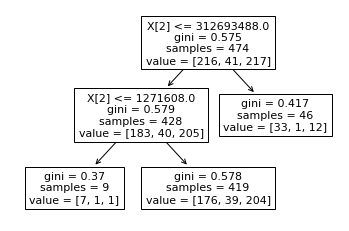

Decision Tree Accuracy: 0.5882352941176471


In [26]:
## Using decision tree on training set

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

## Predict
y_tree_pred = clf.predict(X_test)

## Accuracy?
print( 'Decision Tree Accuracy: {}'.format(np.sum(y_tree_pred ==y_test)/len(y_test)) )  


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

model1 = [rf]
name1 = ['Random Forest']

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

for model, name in zip(model1, name1):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name + ' Accuracy: {}'.format(np.sum(pred==y_test)/len(y_test)) )
 

Random Forest Accuracy: 0.453781512605042


## Now Trying same code with second dataframe 

In [31]:
## Making a df for second df 
df2b = pd.read_csv(r"/Users/maguina/Downloads/SML310/SML310-FinalProjectInfo/data.soc.csv")
df2b = pd.DataFrame(df2b)
df2b = df2b[df2b.columns[1:5]]
df2b.dropna(inplace=True)
print(df2b.head())

## Adding mixed race to POC and removing gender
df2b['Combo'].replace({"Fmixed": "POC", "Mmixed": "POC", "FPOC": 'POC', "MPOC": "POC", "Fwhite": "white", "Mwhite":"white"}, inplace = True)


## predicting race with total streams

## Test/traing/split
X2b = df2b[df2b.columns.tolist()[0:-1]]
y2b = df2b['Combo']

X2b_train, X2b_test, y2b_train, y2b_test = train_test_split(X2b, y2b, random_state=0, test_size = 0.2)

# Checking split
print(X2b_train.shape)
print(X2b_test.shape)
print(y2b_train.shape)
print(y2b_test.shape)

   sum_songs  total_streams   Followers   Combo
0      132.0    275432430.0   4943181.0    MPOC
1        9.0     15699807.0    162763.0  Mwhite
2       21.0     32224508.0  17965158.0  Fwhite
3        1.0      1569970.0    684444.0  Mwhite
4       14.0     48612648.0    225919.0  Mwhite
(100, 3)
(25, 3)
(100,)
(25,)


        sum_songs  total_streams     Followers
count  100.000000   1.000000e+02  1.000000e+02
mean    54.140000   1.605860e+08  6.416615e+06
std    119.859515   4.195948e+08  8.408484e+06
min      1.000000   1.233304e+06  1.047000e+04
25%      6.000000   8.989563e+06  1.951338e+06
50%     14.000000   2.830484e+07  3.579347e+06
75%     48.250000   1.147785e+08  7.510858e+06
max    922.000000   3.441947e+09  5.269876e+07
               sum_songs  total_streams  Followers
sum_songs        1.00000       0.989950   0.613900
total_streams    0.98995       1.000000   0.584816
Followers        0.61390       0.584816   1.000000


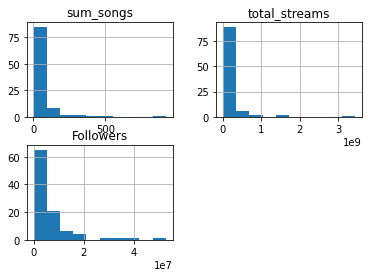

     sum_songs  total_streams   Followers  Combo
30         8.0   1.376272e+07   2096548.0  white
119        4.0   5.889469e+06   1011430.0  white
13        14.0   5.648982e+07    135670.0  white
33       319.0   9.361553e+08  52698756.0  white
75        19.0   3.059127e+07  13781152.0  white
..         ...            ...         ...    ...
67       421.0   1.539487e+09  13325462.0    POC
64        31.0   9.050611e+07  14004245.0  white
121        8.0   9.142679e+06   4510865.0    POC
47       189.0   5.169621e+08   2904919.0    POC
44         7.0   1.286626e+07     23974.0  white

[100 rows x 4 columns]


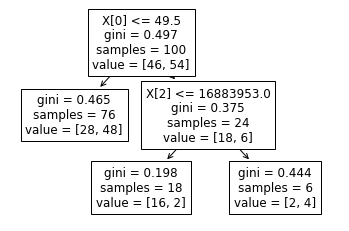

Decision Tree Accuracy: 0.68


In [32]:
## Performing an exploratory data analysis 

## Making a training set on dataset:

X2bs_train = pd.DataFrame(X2b_train)
y2bs_train = pd.DataFrame(y2b_train)

training2b = pd.concat([X2bs_train,y2bs_train], axis = 1)

print(training2b.describe())


## Seeing relataionships between predictors --> some are very similar!!

corr2b = training2b.corr()
print(corr2b)

training2b.hist()
plt.show()
print(training2b)

## Using decision tree on training set

clf2b = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0)
clf2b.fit(X2b_train, y2b_train)

tree.plot_tree(clf2b)
plt.show()

## Predict
y_tree_pred2b = clf2b.predict(X2b_test)

## Accuracy?
print( 'Decision Tree Accuracy: {}'.format(np.sum(y_tree_pred2b ==y2b_test)/len(y2b_test)) )  




In [37]:
## accuracy

for model, name in zip(model1, name1):
    model.fit(X2b_train, y2b_train)
    pred = model.predict(X2b_test)
    print(name + ' Accuracy: {}'.format(np.sum(pred==y2b_test)/len(y2b_test)) )

Random Forest Accuracy: 0.6


## Movies prediction into race!

In [38]:
df3 = pd.read_csv(r"/Users/maguina/Downloads/SML310/SML310-FinalProjectInfo/new.data.add.csv")
df3 = df3[df3.columns[1:7]]
del df3['release_date']
del df3['Year']

print(df3.head())

                       movie_title  inflation_adjusted_gross  IMDb     race
0  Snow White and the Seven Dwarfs              5.228953e+09   7.6    white
1                        Pinocchio              2.188229e+09   7.4    white
2                         Fantasia              2.187091e+09   7.8      NaN
3               Lady and the Tramp              1.236036e+09   7.3  animals
4      The Absent Minded Professor              3.100946e+08   6.8    white


In [39]:
## Making a df for second df
df3 = pd.DataFrame(df3)
df3.dropna(inplace=True)
print(df3.head())

## Adding mixed to POC
df3['race'].replace({"mixed": "POC"}, inplace = True)

## predicting race with total streams

## Test/traing/split
X3 = df3[df3.columns.tolist()[1:-1]]
y3 = df3['race']


X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0, test_size = 0.2)

# Checking split
print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)



                       movie_title  inflation_adjusted_gross  IMDb     race
0  Snow White and the Seven Dwarfs              5.228953e+09   7.6    white
1                        Pinocchio              2.188229e+09   7.4    white
3               Lady and the Tramp              1.236036e+09   7.3  animals
4      The Absent Minded Professor              3.100946e+08   6.8    white
5                 Babes in Toyland              1.248412e+08   6.3    white
(135, 2)
(34, 2)
(135,)
(34,)


       inflation_adjusted_gross        IMDb
count              1.350000e+02  135.000000
mean               2.058522e+08    6.581481
std                5.008831e+08    0.964766
min                0.000000e+00    4.100000
25%                5.050912e+07    5.950000
50%                1.040550e+08    6.700000
75%                2.067329e+08    7.300000
max                5.228953e+09    8.500000
                          inflation_adjusted_gross    IMDb
inflation_adjusted_gross                    1.0000  0.2655
IMDb                                        0.2655  1.0000


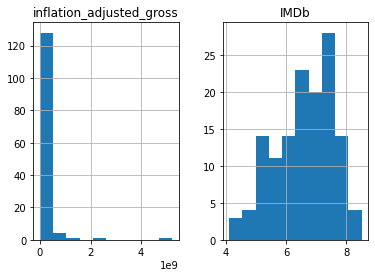

     inflation_adjusted_gross  IMDb     race
65                111792852.0   5.8    white
46                 80147079.0   6.9    white
25                 32798382.0   6.3  animals
67                258728898.0   5.7    white
94                 55189145.0   7.2    white
..                        ...   ...      ...
10                 91305448.0   7.1    white
108                  426246.0   5.1      POC
71                  7829877.0   4.1    white
124                64959548.0   7.8      POC
50                 63170804.0   5.3    white

[135 rows x 3 columns]


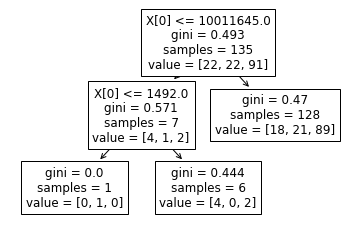

Decision Tree Accuracy: 0.5


In [40]:
## Performing an exploratory data analysis 

## Making a trainig set one dataset:

X3s_train = pd.DataFrame(X3_train)
y3s_train = pd.DataFrame(y3_train)

training3 = pd.concat([X3s_train,y3s_train], axis = 1)

print(training3.describe())


## Seeing relataionships between predictors --> some are very similar!!

corr3 = training3.corr()
print(corr3)

training3.hist()
plt.show()
print(training3)

## C) Using decision tree on training set

clf3 = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0)
clf3.fit(X3_train, y3_train)

tree.plot_tree(clf3)
plt.show()

## Prediciting which are benign and which are malignant for X_test
y_tree_pred3 = clf3.predict(X3_test)

## Accuracy?
print( 'Decision Tree Accuracy: {}'.format(np.sum(y_tree_pred3 ==y3_test)/len(y3_test)) )  



In [41]:
## RF accuracy

for model, name in zip(model1, name1):
    model.fit(X3_train, y3_train)
    pred = model.predict(X3_test)
    print(name + ' Accuracy: {}'.format(np.sum(pred==y3_test)/len(y3_test)) )

Random Forest Accuracy: 0.38235294117647056


## Adding Rotten Tomatoes!

In [42]:
df4 = pd.read_csv(r"/Users/maguina/Downloads/SML310/FinalProject/tomato.race.csv")
df4 = df4[df4.columns[1:7]]
del df4['release_date']
del df4['Year']

print(df4.head())

   inflation_adjusted_gross  IMDb  rotten     race
0              5.228953e+09   7.6    98.0    white
1              2.188229e+09   7.4   100.0    white
2              2.187091e+09   7.8    94.0      NaN
3              1.236036e+09   7.3    93.0  animals
4              3.100946e+08   6.8    83.0    white


In [43]:
## Making a df for second df
df4 = pd.DataFrame(df4)
df4.dropna(inplace=True)
print(df4.head())

## Adding mixed to POC
df4['race'].replace({"mixed": "POC"}, inplace = True)

## predicting race with total streams

## Test/traing/split
X4 = df4[df4.columns.tolist()[1:-1]]
y4 = df4['race']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=0, test_size = 0.2)

# Checking split
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

   inflation_adjusted_gross  IMDb  rotten     race
0              5.228953e+09   7.6    98.0    white
1              2.188229e+09   7.4   100.0    white
3              1.236036e+09   7.3    93.0  animals
4              3.100946e+08   6.8    83.0    white
5              1.248412e+08   6.3    36.0    white
(132, 2)
(34, 2)
(132,)
(34,)


             IMDb      rotten
count  132.000000  132.000000
mean     6.529545   62.651515
std      1.009931   25.946211
min      3.000000    6.000000
25%      5.975000   42.000000
50%      6.600000   66.000000
75%      7.300000   86.000000
max      8.500000  100.000000
           IMDb   rotten
IMDb    1.00000  0.83315
rotten  0.83315  1.00000


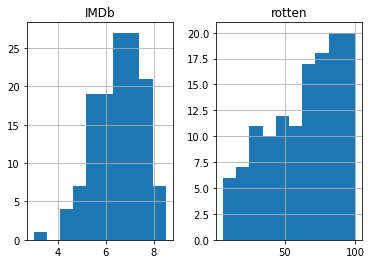

     IMDb  rotten     race
114   5.5    32.0  animals
25    6.3    50.0  animals
164   7.3    67.0      POC
165   7.8    89.0    white
20    6.4    55.0    white
..    ...     ...      ...
10    7.1    65.0    white
109   5.8    26.0    white
72    7.6    86.0      POC
126   8.0    96.0    white
50    5.3     9.0    white

[132 rows x 3 columns]


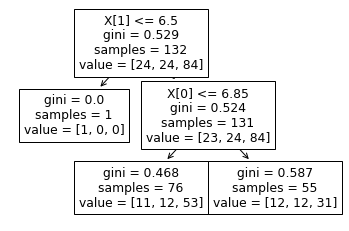

Decision Tree Accuracy: 0.6470588235294118


In [44]:
## b) Performing an exploratory data analysis 

## Making a trainig set one dataset:

X4s_train = pd.DataFrame(X4_train)
y4s_train = pd.DataFrame(y4_train)

training4 = pd.concat([X4s_train,y4s_train], axis = 1)

print(training4.describe())


## Seeing relataionships between predictors --> some are very similar!!

corr4 = training4.corr()
print(corr4)

training4.hist()
plt.show()
print(training4)

## Using decision tree on training set

clf4 = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0)
clf4.fit(X4_train, y4_train)

tree.plot_tree(clf4)
plt.show()

## Prediciting which are benign and which are malignant for X_test
y_tree_pred4 = clf4.predict(X4_test)

## Accuracy?
print( 'Decision Tree Accuracy: {}'.format(np.sum(y_tree_pred4 ==y4_test)/len(y4_test)) )  






In [45]:
## Accuracy

for model, name in zip(model1, name1):
    model.fit(X4_train, y4_train)
    pred = model.predict(X4_test)
    print(name + ' Accuracy: {}'.format(np.sum(pred==y4_test)/len(y4_test)) )

Random Forest Accuracy: 0.5588235294117647


## Trying other types of classifications

In [55]:
## Making a df for second df 
df2c_1 = df2b
print(df2c_1.head())

   sum_songs  total_streams   Followers  Combo
0      132.0    275432430.0   4943181.0    POC
1        9.0     15699807.0    162763.0  white
2       21.0     32224508.0  17965158.0  white
3        1.0      1569970.0    684444.0  white
4       14.0     48612648.0    225919.0  white


In [58]:
## Making race binary

## Getting binary numbers
df2c_2 = pd.get_dummies(df2c_1['Combo'])

## Binary Data is Concatenated into Dataframe
df2c_3 = pd.concat((df2c_1, df2c_2), axis=1)
  
## column is droped
df2c_3 = df2c_3.drop(["Combo"], axis=1)
  
## Drop white column here so now white = 0, POC = 1
df2c_3 = df2c_3.drop(["white"], axis=1)
  
## Rename column
df_pp = df2c_3.rename(columns={"POC": "Race"})

print(df_pp.head())

   sum_songs  total_streams   Followers  Race
0      132.0    275432430.0   4943181.0     1
1        9.0     15699807.0    162763.0     0
2       21.0     32224508.0  17965158.0     0
3        1.0      1569970.0    684444.0     0
4       14.0     48612648.0    225919.0     0


In [ ]:
## predicting race with total streams

## Test/traing/split
X_pp = df_pp[df_pp.columns.tolist()[0:-1]]
y_pp = df_pp['Race']

X_pp_train, X_pp_test, y_pp_train, y_pp_test = train_test_split(X_pp, y_pp, random_state=0, test_size = 0.2)

# Checking split
print(X_pp_train.shape)
print(X_pp_test.shape)
print(y_pp_train.shape)
print(y_pp_test.shape)

In [84]:
## Pre-processing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_pp_train)
X_scaled = scaler.transform(X_pp_train)

In [95]:
## Using pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipe = make_pipeline(StandardScaler(), GaussianNB())
pipe.fit(X_pp_train,y_pp_train)
pipe.score(X_pp_test, y_pp_test)


0.64

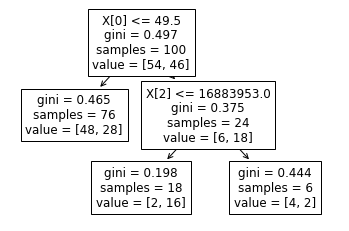

Decision Tree Accuracy: 0.68


In [61]:
## Decision Tree

## Using decision tree on training set

clf_pp = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0)
clf_pp.fit(X_pp_train, y_pp_train)

tree.plot_tree(clf_pp)
plt.show()

## Prediciting which are benign and which are malignant for X_test
y_tree_pred_pp = clf_pp.predict(X_pp_test)

## Accuracy?
print( 'Decision Tree Accuracy: {}'.format(np.sum(y_tree_pred_pp ==y_pp_test)/len(y_pp_test)) )  



In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

## Using pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lgr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svm = LinearSVC()

models = [lgr, nb, knn, svm, rf]
names = ['Logistic Regression', 'Naive Bayes', 'k-Neighbors', 'Support Vector Machine']

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

for model, name in zip(models, names):
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_pp_train, y_pp_train)
    pred = pipe.score(X_pp_test, y_pp_test)
    print(name, pred)
 

Logistic Regression 0.68
Naive Bayes 0.64
k-Neighbors 0.72
Support Vector Machine 0.68
